<a href="https://colab.research.google.com/github/unyime1/medical-cost-prediction/blob/main/normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
# read in insurance dataset
insurance_data = pd.read_csv(
    "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [27]:
# view insurance data
insurance_data.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [23]:
# prepare training data

# Create a column transformaer
ct = make_column_transformer(
    # standardize values in age, bmi and children to between 0 and 1
    (MinMaxScaler(), ["age", "bmi", "children"]),
    # one hot encode sex, smoker, and region
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# create our feature(X) and labels(y)
X = insurance_data.drop("charges", axis=1)
y = insurance_data["charges"]

# create test splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit the column transformer to the training data
ct.fit(X_train)

# transform training and test data with normalization and one hot encoding
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [29]:
# view normalized data
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [26]:
# build a neural network to train on normalized data

# set seed
tf.random.set_seed(42)

# create a model with two dense layer
model = tf.keras.Sequential([
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

# compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)

# fit the model
history = model.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [25]:
# evaluate model
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3168.1599 - mae: 3168.1599


[3168.159912109375, 3168.159912109375]

Text(0.5, 0, 'epoch')

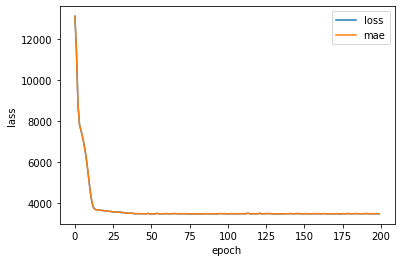

In [30]:
# plot training
pd.DataFrame(history.history).plot()
plt.ylabel("lass")
plt.xlabel("epoch")